<a href="https://colab.research.google.com/github/GigasTaufan/Indonesian-Twitter-Hate-Speech-Classification/blob/master/Twitter_Hate_Speech_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Indonesian Tweet Hate Speech Classification

# Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style='darkgrid')

In [2]:
df = pd.read_csv('IDHSD_RIO_unbalanced_713_2017.txt', sep='\t', header=None, names=['label', 'tweet'], skiprows=1, engine='python')
df

,label,tweet
0,Non_HS,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...
1,Non_HS,RT @baguscondromowo: Mereka terus melukai aksi...
2,Non_HS,Sylvi: bagaimana gurbernur melakukan kekerasan...
3,Non_HS,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja..."
4,Non_HS,RT @lisdaulay28: Waspada KTP palsu.....kawal P...
...,...,...
708,HS,Muka Si BABi Ahok Tuh Yg Mirip SERBET Lantai.....
709,HS,"Betul bang hancurkan merka bang, musnahkan chi..."
710,HS,"Sapa Yg bilang Ahok anti korupsi!?, klo grombo..."
711,HS,"Gw juga ngimpi SENTILIN BIJI BABI AHOK, pcetar..."


# Exploratory Data Analyst

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   713 non-null    object
 1   tweet   713 non-null    object
dtypes: object(2)
memory usage: 11.3+ KB


Dataset terdiri dari 713 baris dan tidak terdapat null value di dalamnya.

In [4]:
df.describe()

,label,tweet
count,713,713
unique,2,703
top,Non_HS,Membangun bangsa dan negara ini engga cukup de...
freq,453,2


In [5]:
df.groupby('label').describe()

tweet                                                               
       count unique                                                top freq
label                                                                      
HS       260    259  Sini lu, kami enggak mau kampung kami didatang...    2
Non_HS   453    444  Seharusnya mah basuki sudah bebas ya kan? #Fre...    2

Berdasarkan deskripsi data yang dijabarkan dari atribut **label** dapat diketahui terdapat 2 kategori di dalamnya yakni Non_HS untuk "non-hate-speech" tweet dan HS untuk "hate-speech" tweet.


Selanjutnya dicoba untuk melihat apakah kedua kategori dapat dengan mudah dipisahkan berdasarkan panjang tweet.

In [6]:
df['length'] = df['tweet'].apply(len)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb6e19202b0>,
      dtype=object)

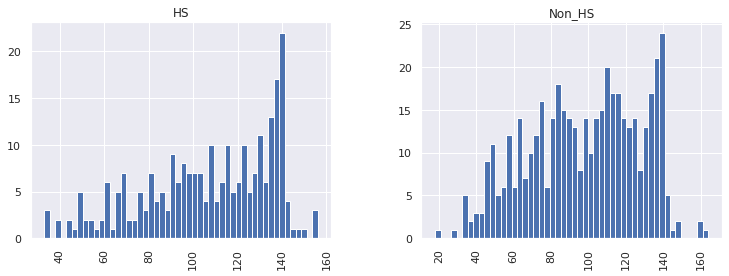

In [37]:
df.hist(column='length', by='label', bins=50,figsize=(12,4))

Dilihat dari panjang tweet kedua kategori hampir sama, namun pada kategori Non-Hate Speech kebanyakan memiliki tweet yang lebih panjang dari pada kategori Hate Speech.

Bagaimana jika dirata-ratakan?

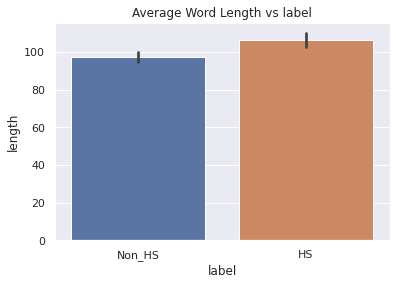

In [32]:
fig1 = sns.barplot(x='label',y='length',data = df)
plt.title('Average Word Length vs label')
plot = fig1.get_figure()

Berdasarkan rata-rata dari panjang tweet, tweet yang termasuk dalam kategori Non-Hate Speech memiliki rata-rata panjang yang lebih pendek dibanding dengan tweet yang termasuk dalam kategori Hate Speech. Namun hal itu belum tentu juga dikarenakan selisih yang sedikit.


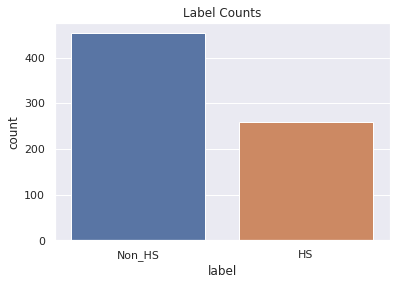

In [8]:
fig2 = sns.countplot(x= 'label',data = df)
plt.title('Label Counts')
plot = fig2.get_figure()

Jumlah tweet yang termasuk kategori Non-Hate Speech lebih banyak daripada yang masuk ke dalam kategori Hate Speech.

# Text Processing


## Over-Sampling Minority Class

Berdasarkan eksplorasi yang dilakukan, jumlah tweet yang masuk pada kategori Non-Hate Speech memiliki jumlah lebih banyak sehingga dataset tidak seimbang.

Untuk dapat mengatasi permasalahan tersebut maka dilakukan proses over-sampling yakni dengan menambah jumlah data pada kategori Hate Speech dengan melakukan copy data hingga jumlah kedua kategori sama.


In [9]:
count_class_NONHS, count_class_HS = df.label.value_counts()

In [35]:
count_class_NONHS

453

In [36]:
count_class_HS

260

In [10]:
df_class_NONHS = df[df['label'] == 'Non_HS']
df_class_HS = df[df['label'] == 'HS']

In [33]:
df_class_NONHS

,label,tweet,length
0,Non_HS,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...,110
1,Non_HS,RT @baguscondromowo: Mereka terus melukai aksi...,108
2,Non_HS,Sylvi: bagaimana gurbernur melakukan kekerasan...,116
3,Non_HS,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja...",115
4,Non_HS,RT @lisdaulay28: Waspada KTP palsu.....kawal P...,79
...,...,...,...
448,Non_HS,Dalam nama Tuhan Untuk jakarta yg lebih baik,44
449,Non_HS,semagat buat pak Anies semoga selalu dalam rah...,59
450,Non_HS,semua warga DKI gunakan hak pilihmu....jangan ...,102
451,Non_HS,semoga Tuhan memberikan seluruh masyarakat DKI...,107


In [34]:
df_class_HS

,label,tweet,length
453,HS,"Ini pasti salah Jokowi, Ahok dan kafir-kafir a...",78
454,HS,@fahmiabuazzam1 biar aja biar tai nya kena bap...,138
455,HS,RT @BungWinar: Angin memporakporandakan basis ...,124
456,HS,"RT @Lupuz0503: Prestasi Ahok, \nSelain mjadi m...",131
457,HS,Ulama Kompak Nyatakan #HaramPemimpinKafir Pili...,62
...,...,...,...
708,HS,Muka Si BABi Ahok Tuh Yg Mirip SERBET Lantai.....,62
709,HS,"Betul bang hancurkan merka bang, musnahkan chi...",107
710,HS,"Sapa Yg bilang Ahok anti korupsi!?, klo grombo...",139
711,HS,"Gw juga ngimpi SENTILIN BIJI BABI AHOK, pcetar...",137


In [11]:
df_class_HS_over = df_class_HS.sample(count_class_NONHS, replace=True)
df_test_over = pd.concat([df_class_NONHS, df_class_HS_over], axis=0)

print('Random over-sampling:')
print(df_test_over.label.value_counts())

Random over-sampling:
Non_HS    453
HS        453
Name: label, dtype: int64


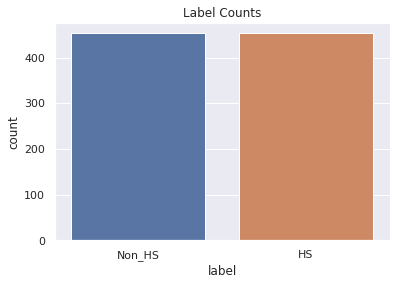

In [12]:
fig3 = sns.countplot(x= 'label',data = df_test_over)
plt.title('Label Counts')
plot = fig3.get_figure()

In [13]:
df_test_over.groupby('label').describe()

length                                                        
        count        mean        std   min   25%    50%    75%    max
label                                                                
HS      453.0  104.633554  30.879482  33.0  82.0  111.0  131.0  156.0
Non_HS  453.0   97.494481  29.750780  18.0  75.0  100.0  122.0  164.0

Jumlah data pada kedua kategori sudah sama

In [14]:
df_test_over

,label,tweet,length
0,Non_HS,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...,110
1,Non_HS,RT @baguscondromowo: Mereka terus melukai aksi...,108
2,Non_HS,Sylvi: bagaimana gurbernur melakukan kekerasan...,116
3,Non_HS,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja...",115
4,Non_HS,RT @lisdaulay28: Waspada KTP palsu.....kawal P...,79
...,...,...,...
670,HS,Udah bingung kalik mau pakai cara apa untuk ka...,135
542,HS,Pendukung berarti dia bagian dr penista agama ...,81
691,HS,AHOK KAFIR BUKAN HANYA MALING TAPI JUGA GARONG...,139
494,HS,RT @Chaeruddin_B: Sekumpulan Teman Penista Aga...,142


## Tokenizing, Filtering, Stopwords, Stemming


In [15]:
! pip install Sastrawi

     |████████████████████████████████| 215kB 6.6MB/s 


In [16]:
from textblob import TextBlob
import re
import nltk
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [17]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [18]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [19]:
def text_processing(tweet):

    # TOKENIZING
    # Menggenerate daftar kata di tweet hastag dan tanda baca dihapus
    def form_sentence(tweet):
        tweet_blob = TextBlob(tweet)
        return ' '.join(tweet_blob.words.lower())
    new_tweet = form_sentence(tweet)
    
    # FILTERING
    # Menghapus stopword dan kata-kata dengan simbol yang tidak biasa
    # Mengubah kata-kata menjadi huruf kecil
    def no_user_alpha(tweet):
        tweet_list = [element for element in tweet.split() if element != '@']
        clean_tokens = [t for t in tweet_list if re.match(r'[^\W\d]*$', t)]
        clean_s = ' '.join(clean_tokens)
        clean_mess = [word for word in clean_s.split() if word.lower() not in stopwords.words('indonesian')]
        return clean_mess
    no_punc_tweet = no_user_alpha(new_tweet)
    
    # STEMMING
    # Melakukan stemming untuk menemukan kata dasar bahasa indonesia dari tweet
    def normalization(tweet_list):
        normalized_tweet = []
        factory = StemmerFactory()
        stemmer = factory.create_stemmer()
        for word in tweet_list:
            normalized_text = stemmer.stem(word)
            normalized_tweet.append(normalized_text)
        return normalized_tweet
    
    
    return normalization(no_punc_tweet)

In [20]:
df_test_over['tweet_list'] = df_test_over['tweet'].apply(text_processing)

In [21]:
df_test_over

,label,tweet,length,tweet_list
0,Non_HS,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...,110,"[rt, spardaxyz, fadli, zon, mendagri, nonaktif..."
1,Non_HS,RT @baguscondromowo: Mereka terus melukai aksi...,108,"[rt, baguscondromowo, luka, aksi, rangka, penj..."
2,Non_HS,Sylvi: bagaimana gurbernur melakukan kekerasan...,116,"[sylvi, gurbernur, keras, perempuan, bukti, fo..."
3,Non_HS,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja...",115,"[ahmad, dhani, puas, debat, pilkada, jalan, be..."
4,Non_HS,RT @lisdaulay28: Waspada KTP palsu.....kawal P...,79,"[rt, waspada, ktp, palsu, kawal, pilkada, https]"
...,...,...,...,...
670,HS,Udah bingung kalik mau pakai cara apa untuk ka...,135,"[udah, bingung, kalik, pakai, kampanye, bikin,..."
542,HS,Pendukung berarti dia bagian dr penista agama ...,81,"[dukung, dr, nista, agama, dukung, gera]"
691,HS,AHOK KAFIR BUKAN HANYA MALING TAPI JUGA GARONG...,139,"[ahok, kafir, maling, garong, lahan, laut, mil..."
494,HS,RT @Chaeruddin_B: Sekumpulan Teman Penista Aga...,142,"[rt, chaeruddin b, kumpul, teman, nista, empat..."


Data telah selesai di pre-process

# Training & Test Data


In [22]:
X = df_test_over['tweet']
y = df_test_over['label']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Klasifikasi dilakukan dengan menggunakan 3 algoritma yakni Random Forest, Multinomial Naive Bayes, dan KNN 

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [25]:
#Machine Learning Pipeline Random Forest
pipeline_rnf = Pipeline([
    ('bow',CountVectorizer(analyzer=text_processing)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', RandomForestClassifier(n_estimators=100)),  # train on TF-IDF vectors w/ Naive Bayes classifier
])
pipeline_rnf.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_processing at 0x7fb6d92d8598>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.

In [26]:
#Machine Learning Pipeline Multinomial Naive Bayes
pipeline_mnb = Pipeline([
    ('bow',CountVectorizer(analyzer=text_processing)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])
pipeline_mnb.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_processing at 0x7fb6d92d8598>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [27]:
#Machine Learning Pipeline KNN
pipeline_knn = Pipeline([
    ('bow',CountVectorizer(analyzer=text_processing)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', KNeighborsClassifier(n_neighbors=2)),  # train on TF-IDF vectors w/ Naive Bayes classifier
])
pipeline_knn.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_processing at 0x7fb6d92d8598>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      m

# Evaluasi

In [28]:
from sklearn import metrics

In [29]:
predictions_rnf = pipeline_rnf.predict(X_test)

print("==== Random Forest ====")
print(metrics.classification_report(predictions_rnf,y_test))
print ('\n')
print(metrics.confusion_matrix(predictions_rnf,y_test))
print(metrics.accuracy_score(predictions_rnf,y_test))

==== Random Forest ====
              precision    recall  f1-score   support

          HS       0.91      0.95      0.93        87
      Non_HS       0.96      0.92      0.94        95

    accuracy                           0.93       182
   macro avg       0.93      0.93      0.93       182
weighted avg       0.94      0.93      0.93       182



[[83  4]
 [ 8 87]]
0.9340659340659341


In [30]:
predictions_mnb = pipeline_mnb.predict(X_test)

print("==== Multinomial Naive Bayes ====")
print(metrics.classification_report(predictions_mnb,y_test))
print ('\n')
print(metrics.confusion_matrix(predictions_mnb,y_test))
print(metrics.accuracy_score(predictions_mnb,y_test))

==== Multinomial Naive Bayes ====
              precision    recall  f1-score   support

          HS       0.96      0.89      0.92        98
      Non_HS       0.88      0.95      0.91        84

    accuracy                           0.92       182
   macro avg       0.92      0.92      0.92       182
weighted avg       0.92      0.92      0.92       182



[[87 11]
 [ 4 80]]
0.9175824175824175


In [31]:
predictions_knn = pipeline_knn.predict(X_test)

print("==== KNN ====")
print(metrics.classification_report(predictions_knn,y_test))
print ('\n')
print(metrics.confusion_matrix(predictions_knn,y_test))
print(metrics.accuracy_score(predictions_knn,y_test))

==== KNN ====
              precision    recall  f1-score   support

          HS       0.91      0.79      0.85       105
      Non_HS       0.76      0.90      0.82        77

    accuracy                           0.84       182
   macro avg       0.84      0.84      0.83       182
weighted avg       0.85      0.84      0.84       182



[[83 22]
 [ 8 69]]
0.8351648351648352


Algoritma Random Forest memiliki akurasi paling tinggi dalam melakukan prediksi dengan nilai akurasi 0.93. 